In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def img_show(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure("Image") # 图像窗口名称
    plt.imshow(img_rgb)
    plt.axis('off') # 关掉坐标轴为 off
    plt.show()

color_dist = {'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},          
              'blue': {'Lower': np.array([108, 88, 58]), 'Upper': np.array([118, 255, 255])},
              'green': {'Lower': np.array([90, 50, 45]), 'Upper': np.array([100, 255, 255])},
              'none': {'Lower': np.array([0, 0, 0]), 'Upper': np.array([255, 255, 255])},}

# 摄像头内参
mtx = np.array([[1.35635605e+03, 0.00000000e+00, 6.46212314e+02],
       [0.00000000e+00, 1.35578874e+03, 3.78009469e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-2.52464877e-01, 1.92828476e-01, -6.55508668e-04, 2.48903668e-03, -7.45335496e-01]])

In [6]:
img = cv2.imread("./obj/obj (1).jpg")

dst = cv2.undistort(img, mtx, dist, None, mtx)

hsv_img = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

# edges = cv2.Canny(inRange_hsv,50,150,apertureSize = 3)

In [7]:
a = np.array([0])
print(np.mean(a))

0.0


0.062255859375


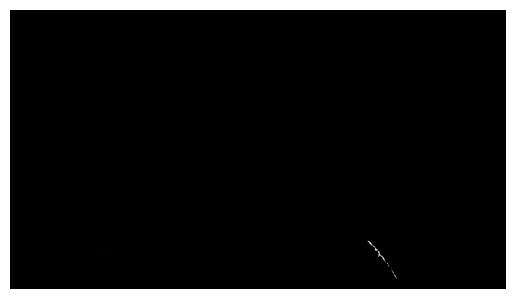

green


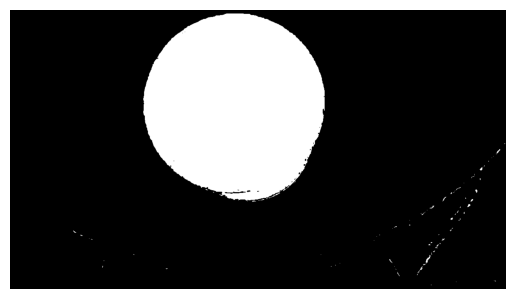

36.024007161458336


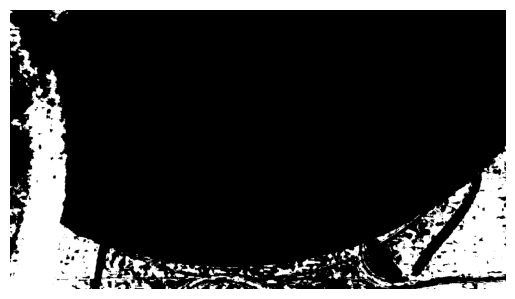

blue


In [8]:
tmp = 0
for color in ["red", "green", "blue"]:
    inRange_hsv = cv2.inRange(hsv_img,
                            color_dist[color]["Lower"], 
                            color_dist[color]["Upper"])
    circle = cv2.HoughCircles(inRange_hsv, cv2.HOUGH_GRADIENT, 3, 60,
                        param1=100, param2=75, minRadius=220, maxRadius=250)
    if circle is not None:
        print (color)
    else:
        if np.mean(inRange_hsv) > tmp:
            tmp = np.mean(inRange_hsv)
            print(tmp)
            prb_color = color
    img_show(inRange_hsv)
print(prb_color)


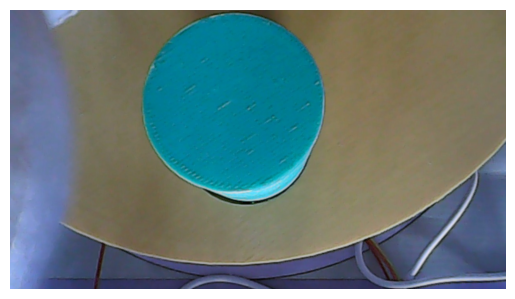

In [9]:
img_show(dst)

In [10]:
# 将检测结果绘制在图像上
for i in circles[0, :]:  # 遍历矩阵的每一行的数据
    # 绘制圆形
    cv2.circle(dst, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 10)
    # 绘制圆心
    cv2.circle(dst, (int(i[0]), int(i[1])), 10, (255, 0, 0), -1)

img_show(dst)

NameError: name 'circles' is not defined

In [ ]:
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret,img_bin=cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
# img_dst = cv2.medianBlur(img_gray, 7)